* source: https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
* source: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html


## Dataset
Scikit-learn deals with learning information from one or more datasets that are represented as 2D arrays. They can be understood as a list of multi-dimensional observations. We say that the first axis of these arrays is the samples axis, while the second is the features axis.

In [1]:
"""A simple example shipped with scikit-learn: iris dataset
It is made of 150 observations of irises, each described by 4 features: 
their sepal and petal length and width, as detailed in iris.DESCR."""

from sklearn import datasets
iris = datasets.load_iris()
iris_y = iris.target
iris_X = iris.data
iris_X.shape

(150, 4)

In [2]:
# wrangling the sklearn dataset into a pandas dataframe and sampling some rows randomly

import pandas as pd
target_name = [iris.target_names[target] for target in iris.target]
labeled_dataframe = pd.DataFrame(iris.data, index=target_name, columns=iris.feature_names)
labeled_dataframe.sample(7)

sepal length (cm)  sepal width (cm)  petal length (cm)  \
versicolor                6.4               2.9                4.3   
virginica                 7.7               3.0                6.1   
versicolor                5.7               2.9                4.2   
virginica                 5.8               2.7                5.1   
versicolor                7.0               3.2                4.7   
setosa                    4.9               3.1                1.5   
virginica                 6.3               2.8                5.1   

            petal width (cm)  
versicolor               1.3  
virginica                2.3  
versicolor               1.3  
virginica                1.9  
versicolor               1.4  
setosa                   0.1  
virginica                1.5

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The below plot uses the first two features. See here for more information on this dataset.

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])



[]

## Nearest neighbor

The iris dataset is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width

### k-Nearest neighbors classifier

The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector. (Please see the Nearest Neighbors section of the online Scikit-learn documentation for more information about this type of classifier.)

### Training set and testing set

While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.


In [4]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
import numpy as np

np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [6]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

# Decision Surfact of KNN on only 2 variables

https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py

In [7]:

def show_decision_surface(model):
    
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Train
        clf = model.fit(X, y)

        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

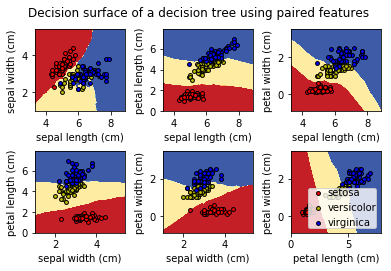

In [8]:
show_decision_surface(KNeighborsClassifier())

# Decision Surfact of Decision Tree on only 2 variables


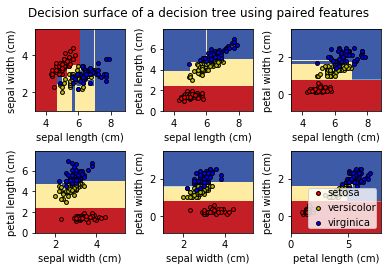

In [9]:
from sklearn.tree import DecisionTreeClassifier

show_decision_surface(DecisionTreeClassifier())

# classifier comparison

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# The curse of dimensionality

https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#the-curse-of-dimensionality